# 《保险反欺诈预测》

In [68]:
import warnings 
warnings.filterwarnings("ignore")

# 数据预处理与特征工程

In [2]:
import pandas as pd
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,policy_id,age,customer_months,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud
0,122576,37,189,2013-08-21,C,500/1000,1000,1465.71,5000000,455456,...,3,?,54930,6029,5752,44452,Nissan,Maxima,2000,0
1,937713,44,234,1998-01-04,B,250/500,500,821.24,0,591805,...,1,YES,50680,5376,10156,37347,Honda,Civic,1996,0
2,680237,33,23,1996-02-06,B,500/1000,1000,1844.00,0,442490,...,1,NO,47829,4460,9247,33644,Jeep,Wrangler,2002,0
3,513080,42,210,2008-11-14,A,500/1000,500,1867.29,0,439408,...,2,YES,68862,11043,5955,53548,Suburu,Legacy,2003,1
4,192875,29,81,2002-01-08,A,100/300,1000,816.25,0,640575,...,1,YES,59726,5617,10301,41550,Ford,F150,2004,0


In [4]:
train.info() # 原数据集中的缺失值以‘？’标出

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   policy_id                    700 non-null    int64  
 1   age                          700 non-null    int64  
 2   customer_months              700 non-null    int64  
 3   policy_bind_date             700 non-null    object 
 4   policy_state                 700 non-null    object 
 5   policy_csl                   700 non-null    object 
 6   policy_deductable            700 non-null    int64  
 7   policy_annual_premium        700 non-null    float64
 8   umbrella_limit               700 non-null    int64  
 9   insured_zip                  700 non-null    int64  
 10  insured_sex                  700 non-null    object 
 11  insured_education_level      700 non-null    object 
 12  insured_occupation           700 non-null    object 
 13  insured_hobbies     

In [5]:
import numpy as np
train.replace('?',np.nan,inplace=True) # 原数据中空值为问号，替换为np空值
names = train.columns
print(names)

Index(['policy_id', 'age', 'customer_months', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_hour_of_the_day', 'number_of_vehicles_involved',
       'property_damage', 'bodily_injuries', 'witnesses',
       'police_report_available', 'total_claim_amount', 'injury_claim',
       'property_claim', 'vehicle_claim', 'auto_make', 'auto_model',
       'auto_year', 'fraud'],
      dtype='object')


In [6]:
train.isna().sum()  # 缺失值在变量中的比例较高，决定将其作为一种类型处理而不将其替代

policy_id                        0
age                              0
customer_months                  0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 123
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                259
bodily_injuries                  0
witnesses           

In [7]:
train.replace(np.nan,'?',inplace=True)
train.isna().sum()

policy_id                      0
age                            0
customer_months                0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_report_available        0
total_clai

In [8]:
lsofdis = [4,5,9,10,11,12,13,14,18,19,20,21,22,23,26,29,34,35,36]
X = train.iloc[:,lsofdis]
X.head()

,policy_state,policy_csl,insured_zip,insured_sex,insured_education_level,insured_occupation,insured_hobbies,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,property_damage,police_report_available,auto_make,auto_model,auto_year
0,C,500/1000,455456,FEMALE,Masters,protective-serv,reading,not-in-family,Single Vehicle Collision,Side Collision,Total Loss,Ambulance,S5,Riverwood,?,?,Nissan,Maxima,2000
1,B,250/500,591805,MALE,JD,craft-repair,polo,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Other,S5,Springfield,?,YES,Honda,Civic,1996
2,B,500/1000,442490,FEMALE,High School,machine-op-inspct,skydiving,wife,Single Vehicle Collision,Side Collision,Total Loss,Police,S3,Northbend,?,NO,Jeep,Wrangler,2002
3,A,500/1000,439408,MALE,JD,transport-moving,video-games,own-child,Multi-vehicle Collision,Front Collision,Major Damage,Fire,S3,Northbend,YES,YES,Suburu,Legacy,2003
4,A,100/300,640575,FEMALE,MD,craft-repair,video-games,own-child,Multi-vehicle Collision,Rear Collision,Total Loss,Fire,S2,Northbend,YES,YES,Ford,F150,2004


In [9]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
X = enc.fit_transform(X)
X

array([[  2.,   2., 245., ...,   9.,  26.,   5.],
       [  1.,   1., 529., ...,   6.,  10.,   1.],
       [  1.,   2., 117., ...,   7.,  36.,   7.],
       ...,
       [  2.,   0., 677., ...,   8.,   7.,   7.],
       [  1.,   2.,  62., ...,   1.,   4.,  12.],
       [  2.,   2.,  74., ...,  11.,  15.,  13.]])

In [10]:
names[lsofdis]

Index(['policy_state', 'policy_csl', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_type', 'collision_type',
       'incident_severity', 'authorities_contacted', 'incident_state',
       'incident_city', 'property_damage', 'police_report_available',
       'auto_make', 'auto_model', 'auto_year'],
      dtype='object')

In [11]:
X_T = X.T
for a,b in zip(names[lsofdis],X_T):
    train[a] = b
train.head() # 将分类变量处理好的训练集

,policy_id,age,customer_months,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud
0,122576,37,189,2013-08-21,2.0,2.0,1000,1465.71,5000000,245.0,...,3,0.0,54930,6029,5752,44452,9.0,26.0,5.0,0
1,937713,44,234,1998-01-04,1.0,1.0,500,821.24,0,529.0,...,1,2.0,50680,5376,10156,37347,6.0,10.0,1.0,0
2,680237,33,23,1996-02-06,1.0,2.0,1000,1844.00,0,117.0,...,1,1.0,47829,4460,9247,33644,7.0,36.0,7.0,0
3,513080,42,210,2008-11-14,0.0,2.0,500,1867.29,0,102.0,...,2,2.0,68862,11043,5955,53548,11.0,21.0,8.0,1
4,192875,29,81,2002-01-08,0.0,0.0,1000,816.25,0,679.0,...,1,2.0,59726,5617,10301,41550,5.0,14.0,9.0,0


对于保险绑定日期和出险日期，由于具体日期各异，不能划分为分类变量，因此将它们的差值——保险持有日期，作为新的连续型变量

In [12]:
t1 = train['policy_bind_date']
t2 = train['incident_date']
datepd = []
from datetime import datetime
#date_object = datetime.strptime(date_string, "%d %B, %Y")
for str1,str2 in zip(t1,t2):
    d1 =datetime.strptime(str1,'%Y-%m-%d')
    d2 =datetime.strptime(str2,'%Y-%m-%d')
    f = d2 -d1
    datepd.append(f.days)
len(datepd)

700

In [13]:
train['DatePeriod'] = datepd
train.head(5)

,policy_id,age,customer_months,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud,DatePeriod
0,122576,37,189,2013-08-21,2.0,2.0,1000,1465.71,5000000,245.0,...,0.0,54930,6029,5752,44452,9.0,26.0,5.0,0,488
1,937713,44,234,1998-01-04,1.0,1.0,500,821.24,0,529.0,...,2.0,50680,5376,10156,37347,6.0,10.0,1.0,0,6254
2,680237,33,23,1996-02-06,1.0,2.0,1000,1844.00,0,117.0,...,1.0,47829,4460,9247,33644,7.0,36.0,7.0,0,6921
3,513080,42,210,2008-11-14,0.0,2.0,500,1867.29,0,102.0,...,2.0,68862,11043,5955,53548,11.0,21.0,8.0,1,2271
4,192875,29,81,2002-01-08,0.0,0.0,1000,816.25,0,679.0,...,2.0,59726,5617,10301,41550,5.0,14.0,9.0,0,4780


In [14]:
# 去除policy_bind_date和incident_date，得到最终训练集
train = train.drop(columns=['policy_bind_date','incident_date'])
train.head(5)

,policy_id,age,customer_months,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud,DatePeriod
0,122576,37,189,2.0,2.0,1000,1465.71,5000000,245.0,0.0,...,0.0,54930,6029,5752,44452,9.0,26.0,5.0,0,488
1,937713,44,234,1.0,1.0,500,821.24,0,529.0,1.0,...,2.0,50680,5376,10156,37347,6.0,10.0,1.0,0,6254
2,680237,33,23,1.0,2.0,1000,1844.00,0,117.0,0.0,...,1.0,47829,4460,9247,33644,7.0,36.0,7.0,0,6921
3,513080,42,210,0.0,2.0,500,1867.29,0,102.0,1.0,...,2.0,68862,11043,5955,53548,11.0,21.0,8.0,1,2271
4,192875,29,81,0.0,0.0,1000,816.25,0,679.0,0.0,...,2.0,59726,5617,10301,41550,5.0,14.0,9.0,0,4780


In [15]:
from sklearn.utils import shuffle
train1 = shuffle(train, random_state=2023)
train1.head()

,policy_id,age,customer_months,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud,DatePeriod
127,793525,31,126,2.0,1.0,500,1333.95,0,109.0,0.0,...,1.0,68946,11719,11479,48945,8.0,24.0,14.0,0,3533
304,736404,43,228,0.0,1.0,1000,1343.99,7000000,306.0,0.0,...,2.0,11092,1623,855,8308,8.0,12.0,18.0,0,477
158,868720,31,82,2.0,2.0,1000,1033.25,0,95.0,0.0,...,2.0,59050,5595,11368,42635,9.0,35.0,11.0,1,2050
651,281786,29,3,1.0,0.0,500,1044.48,5000000,680.0,0.0,...,0.0,4920,512,998,3542,8.0,12.0,13.0,1,8107
384,683001,51,351,2.0,0.0,2000,1377.48,0,77.0,1.0,...,1.0,86805,7786,14547,60179,1.0,5.0,9.0,0,8290


In [16]:
#划分自变量和因变量
X_tr = train1.drop(columns=['policy_id','fraud'])
Y_tr = train1['fraud']

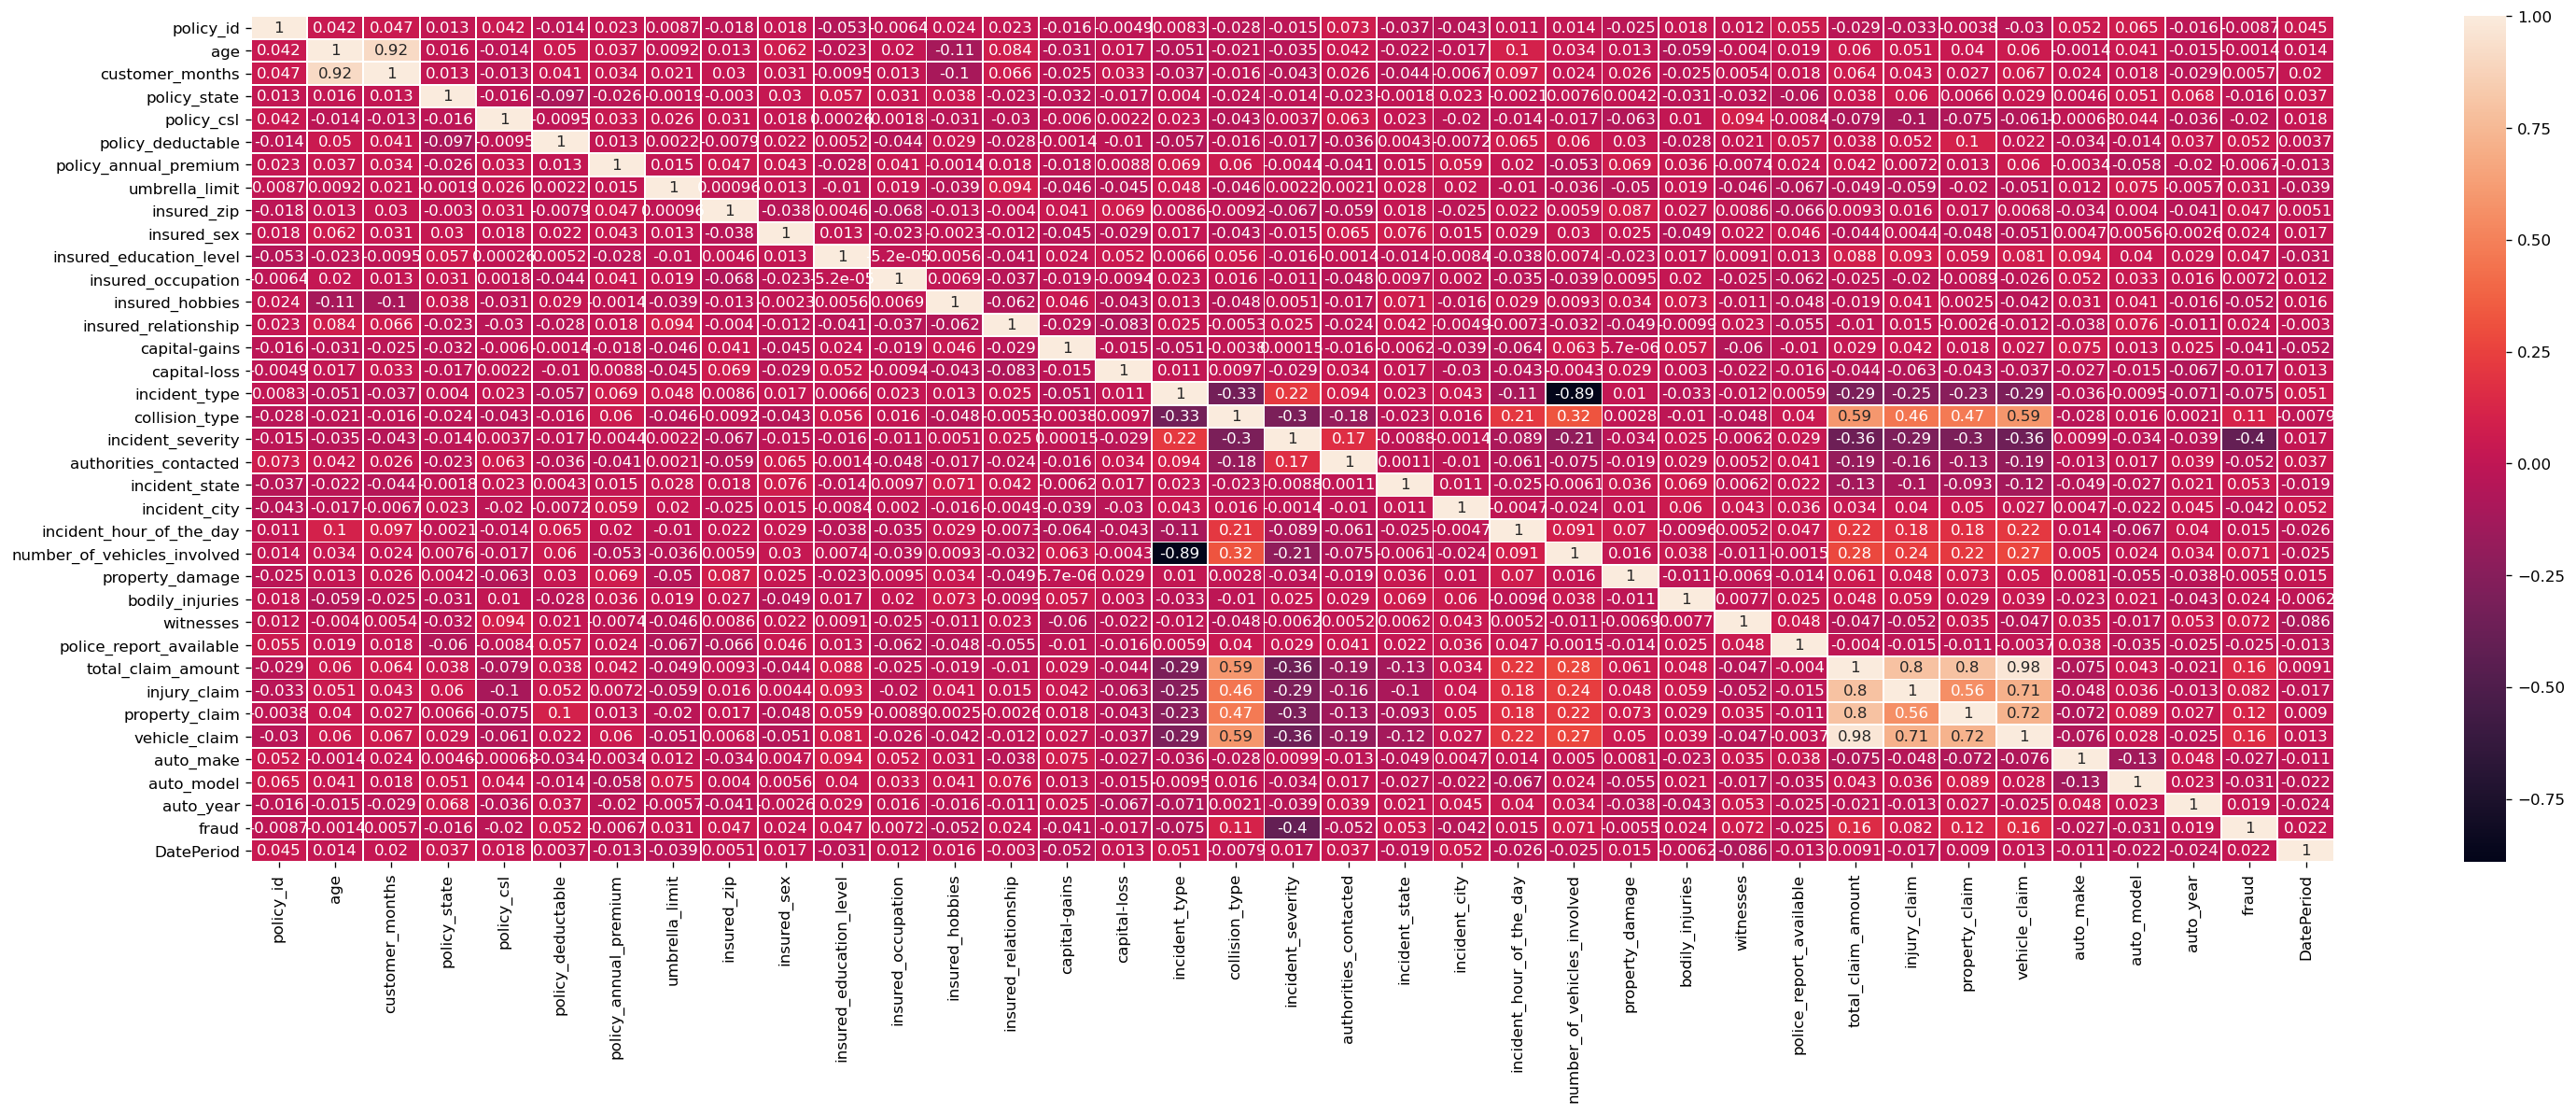

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
corrmat = train1.corr()
plt.figure(dpi=120, figsize=(30, 10))
fig = sns.heatmap(corrmat, square=False, linewidths=.5, annot=True)
save = fig.get_figure()
save.savefig('C:/Users/88483/Documents/学业/第五学期/机器学习/Final Project/hatmap.png')

In [18]:
print(corrmat["fraud"].sort_values(ascending=False)) # 打印与fraud相关系数排行

fraud                          1.000000
vehicle_claim                  0.164941
total_claim_amount             0.155167
property_claim                 0.120906
collision_type                 0.109812
injury_claim                   0.082015
witnesses                      0.072243
number_of_vehicles_involved    0.071055
incident_state                 0.053205
policy_deductable              0.051987
insured_zip                    0.047093
insured_education_level        0.046549
umbrella_limit                 0.031321
bodily_injuries                0.024079
insured_sex                    0.023997
insured_relationship           0.023967
DatePeriod                     0.021705
auto_year                      0.019323
incident_hour_of_the_day       0.014834
insured_occupation             0.007245
customer_months                0.005680
age                           -0.001386
property_damage               -0.005542
policy_annual_premium         -0.006739
policy_id                     -0.008707


In [19]:
#根据上述结果，只保留高度相关变量中的一个
X_tr = X_tr.drop(columns=['incident_type','property_claim','vehicle_claim','injury_claim'])

In [20]:
X_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 127 to 537
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          700 non-null    int64  
 1   customer_months              700 non-null    int64  
 2   policy_state                 700 non-null    float64
 3   policy_csl                   700 non-null    float64
 4   policy_deductable            700 non-null    int64  
 5   policy_annual_premium        700 non-null    float64
 6   umbrella_limit               700 non-null    int64  
 7   insured_zip                  700 non-null    float64
 8   insured_sex                  700 non-null    float64
 9   insured_education_level      700 non-null    float64
 10  insured_occupation           700 non-null    float64
 11  insured_hobbies              700 non-null    float64
 12  insured_relationship         700 non-null    float64
 13  capital-gains     

In [21]:
Y_tr.value_counts() # 由于两类标签数量相差较大，故采用oversampling的方法增加1标签

0    519
1    181
Name: fraud, dtype: int64

In [22]:
from imblearn.over_sampling import SMOTE
x_train,y_train = SMOTE(random_state=2023).fit_resample(X_tr,Y_tr)

In [23]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1038 entries, 0 to 1037
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          1038 non-null   int64  
 1   customer_months              1038 non-null   int64  
 2   policy_state                 1038 non-null   float64
 3   policy_csl                   1038 non-null   float64
 4   policy_deductable            1038 non-null   int64  
 5   policy_annual_premium        1038 non-null   float64
 6   umbrella_limit               1038 non-null   int64  
 7   insured_zip                  1038 non-null   float64
 8   insured_sex                  1038 non-null   float64
 9   insured_education_level      1038 non-null   float64
 10  insured_occupation           1038 non-null   float64
 11  insured_hobbies              1038 non-null   float64
 12  insured_relationship         1038 non-null   float64
 13  capital-gains     

In [24]:
y_train.value_counts()

1    519
0    519
Name: fraud, dtype: int64

对测试集数据进行相同处理

In [25]:
test = pd.read_csv('test.csv')
X1 = test.iloc[:,lsofdis]
X1.head()

enc = OrdinalEncoder()
X1= enc.fit_transform(X1)
X1

X1_T = X1.T
for a,b in zip(names[lsofdis],X1_T):
    test[a] = b
#test.head()

t11 = test['policy_bind_date']
t22 = test['incident_date']
datepd1 = []
for str1,str2 in zip(t11,t22):
    d1 =datetime.strptime(str1,'%Y-%m-%d')
    d2 =datetime.strptime(str2,'%Y-%m-%d')
    f = d2 -d1
    datepd1.append(f.days)
len(datepd1)

test['DatePeriod'] = datepd1
test.head(5)
test= test.drop(columns=['policy_bind_date','incident_date'])
X_te = test.drop(columns=['policy_id'])
Y_te= []
X_te = X_te.drop(columns=['incident_type','property_claim','vehicle_claim','injury_claim'])

In [26]:
X_te.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   age                          300 non-null    int64  
 1   customer_months              300 non-null    int64  
 2   policy_state                 300 non-null    float64
 3   policy_csl                   300 non-null    float64
 4   policy_deductable            300 non-null    int64  
 5   policy_annual_premium        300 non-null    float64
 6   umbrella_limit               300 non-null    int64  
 7   insured_zip                  300 non-null    float64
 8   insured_sex                  300 non-null    float64
 9   insured_education_level      300 non-null    float64
 10  insured_occupation           300 non-null    float64
 11  insured_hobbies              300 non-null    float64
 12  insured_relationship         300 non-null    float64
 13  capital-gains       

# 模型学习与模型评价

### 逻辑回归

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
lg = LogisticRegression()
parameter = {'C':(0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3,5,10)} # 使用GridSearchCV方法调参
clf_lg = GridSearchCV(lg,parameter)
clf_lg.fit(x_train,y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': (0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3, 5,
                               10)})

In [29]:
print('最优参数',clf_lg.best_params_) # 最优参数

最优参数 {'C': 0.01}


### 模型评价

In [46]:
from sklearn import metrics # 模型评价模块

In [31]:
# 由于竞赛没有给出测试集结果，因此仅比较训练集结果
Yhat = clf_lg.predict(x_train)
ACC1 = metrics.accuracy_score(y_train,Yhat) # 精度
AUC1 = metrics.roc_auc_score(y_train,Yhat) # AUC
AP1 = metrics.average_precision_score(y_train,Yhat, average='macro', sample_weight=None) # 平均精度
print("ACC:",ACC1,"\nAUC:",AUC1,"\nAP:",AP1)

ACC: 0.5973025048169557 
AUC: 0.5973025048169557 
AP: 0.556882033804217


### 支持向量机——线性分类机

In [32]:
from sklearn.svm import LinearSVC #导入支持向量机模块中的线性分类机

In [39]:
SVC = LinearSVC()
para = {'penalty':('l1','l2'),'C':(0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3,5,10)} # 不仅对正则化项进行调参，同时尝试不同的正则化方法
clf_svc = GridSearchCV(SVC,para)
clf_svc.fit(x_train,y_train)

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': (0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1.0, 3, 5,
                               10),
                         'penalty': ('l1', 'l2')})

In [40]:
clf_svc.best_params_ # 最优参数

{'C': 3, 'penalty': 'l2'}

### 模型评价

In [41]:
Yhat = clf_svc.predict(x_train)
ACC2 = metrics.accuracy_score(y_train,Yhat) # 精度
AUC2 = metrics.roc_auc_score(y_train,Yhat) # AUC
AP2 = metrics.average_precision_score(y_train,Yhat, average='macro', sample_weight=None) # 平均精度
print("ACC:",ACC2,"\nAUC:",AUC2,"\nAP:",AP2)

ACC: 0.5905587668593449 
AUC: 0.5905587668593449 
AP: 0.5507082890959852


### 支持向量机——非线性分类机

In [51]:
from sklearn.svm import SVC
svc = SVC()
para = {'kernel':('poly', 'rbf', 'sigmoid')}
clf_nlsvc = GridSearchCV(svc,para)
clf_nlsvc.fit(x_train,y_train)

GridSearchCV(estimator=SVC(), param_grid={'kernel': ('poly', 'rbf', 'sigmoid')})

In [52]:
clf_nlsvc.best_params_

{'kernel': 'rbf'}

### 模型评价

In [62]:
Yhat = clf_nlsvc.predict(x_train)
ACC3 = metrics.accuracy_score(y_train,Yhat) 
AUC3 = metrics.roc_auc_score(y_train,Yhat) # AUC
AP3 = metrics.average_precision_score(y_train,Yhat, average='macro', sample_weight=None) # 平均精度
print("ACC:",ACC3,"\nAUC:",AUC3,"\nAP:",AP3)

ACC: 0.5260115606936416 
AUC: 0.5260115606936416 
AP: 0.5146700271210586


### K近邻模型

In [59]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=3)
KNN.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

### 模型评价

In [61]:
Y_knn = KNN.predict(x_train)
ACC4 = metrics.accuracy_score(y_train,Y_knn) # 精度
AUC4 = metrics.roc_auc_score(y_train,Y_knn) # AUC
AP4 = metrics.average_precision_score(y_train,Y_knn, average='macro', sample_weight=None) # 平均精度
print("ACC:",ACC4,"\nAUC:",AUC4,"\nAP:",AP4)

ACC: 0.8554913294797688 
AUC: 0.8554913294797688 
AP: 0.7876085630464461


### 随机森林

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
rf=RandomForestClassifier()
param = {"n_estimators":[5,10,25,50,100,200,500],"max_depth":[3,5,8,15,25,30]}
clf_rf = GridSearchCV(rf,param_grid=param,cv=5)
clf_rf.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 8, 15, 25, 30],
                         'n_estimators': [5, 10, 25, 50, 100, 200, 500]})

In [60]:
clf_rf.best_params_ # 最优参数

{'max_depth': 30, 'n_estimators': 25}

### 模型评价（随机森林算法中以训练集得到的结果评价意义不大）

In [63]:
Y_rf = clf_rf.predict(x_train)
ACC5 = metrics.accuracy_score(y_train,Y_rf) # 精度
AUC5 = metrics.roc_auc_score(y_train,Y_rf) # AUC
AP5 = metrics.average_precision_score(y_train,Y_rf, average='macro', sample_weight=None) # 平均精度
print("ACC:",ACC5,"\nAUC:",AUC5,"\nAP:",AP5)

ACC: 1.0 
AUC: 1.0 
AP: 1.0


### GBDT

In [66]:
from sklearn.ensemble import GradientBoostingClassifier

In [63]:
param_test = {'n_estimators': range(15, 25, 20),'max_depth':[5,6,8,10,15]}
gbdt = GradientBoostingClassifier(random_state=10)
clf_gbdt = GridSearchCV(gbdt, param_grid=param_test,cv=5)
clf_gbdt.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=10),
             param_grid={'max_depth': [5, 6, 8, 10, 15],
                         'n_estimators': range(15, 25, 20)})

In [101]:
clf_gbdt.best_params_ # 最优参数

{'max_depth': 6, 'n_estimators': 15}

### 模型评价

In [102]:
Y_gbdt = clf_gbdt.predict(x_train)
ACC6 = metrics.accuracy_score(y_train,Y_gbdt) # 精度
AUC6 = metrics.roc_auc_score(y_train,Y_gbdt) # AUC
AP6 = metrics.average_precision_score(y_train,Y_gbdt, average='macro', sample_weight=None) # 平均精度
print("ACC:",ACC6,"\nAUC:",AUC6,"\nAP:",AP6)

ACC: 0.9807321772639692 
AUC: 0.9807321772639692 
AP: 0.971469514888941


### 神经网络

In [65]:
from sklearn.neural_network import MLPClassifier

In [66]:
mlp = MLPClassifier()
para = {'solver':('lbfgs','sgd','adam')}
clf_mlp = GridSearchCV(mlp, param_grid=para) # 首先选择合适的solver
clf_mlp.fit(x_train,y_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'solver': ('lbfgs', 'sgd', 'adam')})

In [74]:
clf_mlp.best_params_

{'solver': 'adam'}

In [67]:
mlp = MLPClassifier(solver='adam')
para = {'alpha':(0.0001,0.001,0.01,0.05,0.1,0.5,1,3,5)}
clf_mlp = GridSearchCV(mlp, param_grid=para) # 再调节正则化项
clf_mlp.fit(x_train,y_train)

GridSearchCV(estimator=MLPClassifier(),
             param_grid={'alpha': (0.0001, 0.001, 0.01, 0.05, 0.1, 0.5, 1, 3,
                                   5)})

In [77]:
clf_mlp.best_params_

{'alpha': 0.01}

### 模型评价

In [80]:
Y_mlp = clf_mlp.predict(x_train)
ACC7 = metrics.accuracy_score(y_train,Y_mlp) # 精度
AUC7 = metrics.roc_auc_score(y_train,Y_mlp) # AUC
AP7 = metrics.average_precision_score(y_train,Y_mlp, average='macro', sample_weight=None) # 平均精度
print("ACC:",ACC7,"\nAUC:",AUC7,"\nAP:",AP7)

ACC: 0.5385356454720617 
AUC: 0.5385356454720618 
AP: 0.5226481425142819


# 总结

## 综合上述各个模型的结果情况，随机森林、GBDT和KNN方法的结果比较好，将他们的测试集预测结果保存并上传天池平台查看最终结果。

In [51]:
submission = pd.read_csv('./submission.csv')
submission

,policy_id,fraud
0,681822,NaN
1,301288,NaN
2,212001,NaN
3,797680,NaN
4,789334,NaN
...,...,...
295,663065,NaN
296,283767,NaN
297,325099,NaN
298,465673,NaN


In [84]:
y1 = KNN.predict(X_te)
submission['fraud'] = y1
submission.to_csv('./baseline.csv', index=False) # 0.5834

In [86]:
y2 = clf_rf.predict(X_te)
submission['fraud'] = y2
submission.to_csv('./baseline.csv', index=False) # 0.8030

In [99]:
y3 = clf_gbdt.predict(X_te)
submission['fraud'] = y3
submission.to_csv('./baseline.csv', index=False) # 0.8651

In [105]:
y4 = clf_gbdt.predict_proba(X_te)
submission['fraud'] = y4[:,1]
submission.to_csv('./baseline.csv', index=False) # 0.9438 以gbdt结果的概率提交，得分更好

# 故GBDT效果最好

## 为了进一步提升最终得分，决定对GBDT模型进行更加细致的调参

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
# GBDT调参
# 设置迭代次数的范围
param_test1 = {'n_estimators': range(20, 251, 10)}
estimator = GradientBoostingClassifier(learning_rate=0.2, min_samples_split=50, min_samples_leaf=5, max_depth=8,
                                       max_features='sqrt', subsample=0.8, random_state=10)
gsearch1 = GridSearchCV(estimator, param_grid=param_test1, scoring='roc_auc', n_jobs=4,cv=5)
gsearch1.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_leaf=5,
                                                  min_samples_split=50,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'n_estimators': range(20, 251, 10)},
             scoring='roc_auc')

In [32]:
print(gsearch1.best_score_)
print(gsearch1.best_params_)

0.9482673996093526
{'n_estimators': 250}


In [35]:
# 调试决策树的相关参数：max_features和min_samples_split
# Grid search on subsample and max_features
param_test2 = {'max_depth': range(1, 9, 1), 'min_samples_split': range(10, 101, 10)}
estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=250, max_features='sqrt', subsample=0.8,
                                       random_state=10)
gsearch2 = GridSearchCV(estimator, param_grid=param_test2, scoring='roc_auc', n_jobs=4, cv=5)
gsearch2.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  max_features='sqrt',
                                                  n_estimators=250,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4,
             param_grid={'max_depth': range(1, 9),
                         'min_samples_split': range(10, 101, 10)},
             scoring='roc_auc')

In [36]:
print(gsearch2.best_score_)
print(gsearch2.best_params_)

0.9561753174010456
{'max_depth': 8, 'min_samples_split': 10}


In [37]:
# 调试决策树的相关参数：min_samples_split和min_samples_leaf
# Grid search on min_samples_split and min_samples_leaf
# param_test3 = {'min_samples_split': range(90, 201, 20), 'min_samples_leaf': range(5, 51, 5)}
param_test3 = {'min_samples_leaf': range(5, 51, 5)}
estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=250, max_depth=8, min_samples_split=10, max_features='sqrt',
                                       subsample=0.8, random_state=10)
gsearch3 = GridSearchCV(estimator, param_grid=param_test3, scoring='roc_auc', n_jobs=4,cv=5)
gsearch3.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  max_depth=8,
                                                  max_features='sqrt',
                                                  min_samples_split=10,
                                                  n_estimators=250,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'min_samples_leaf': range(5, 51, 5)},
             scoring='roc_auc')

In [38]:
print(gsearch3.best_score_)
print(gsearch3.best_params_)

0.9517668897569944
{'min_samples_leaf': 5}


In [39]:
# 调试决策树的相关参数：max_features
# Grid search on max_features
param_test4 = {'max_features': range(1, 8, 1)}
estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=250, max_depth=8, min_samples_split=10,
                                       min_samples_leaf=5, subsample=0.8, random_state=10)
gsearch4 = GridSearchCV(estimator, param_grid=param_test4, scoring='roc_auc', n_jobs=4,cv=5)
gsearch4.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  max_depth=8,
                                                  min_samples_leaf=5,
                                                  min_samples_split=10,
                                                  n_estimators=250,
                                                  random_state=10,
                                                  subsample=0.8),
             n_jobs=4, param_grid={'max_features': range(1, 8)},
             scoring='roc_auc')

In [40]:
print(gsearch4.best_score_)
print(gsearch4.best_params_)

0.9562968561498248
{'max_features': 6}


In [41]:
# 调试决策树相关参数：Sunsample
# Grid search on subsample and max_features
param_test5 = {'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]}
 
estimator = GradientBoostingClassifier(learning_rate=0.2, n_estimators=250, max_depth=8, min_samples_split=10,
                                       min_samples_leaf=5,random_state=10,max_features=6)
gsearch5 = GridSearchCV(estimator, param_grid=param_test5, scoring='roc_auc', n_jobs=4,cv=5)
gsearch5.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(learning_rate=0.2,
                                                  max_depth=8, max_features=6,
                                                  min_samples_leaf=5,
                                                  min_samples_split=10,
                                                  n_estimators=250,
                                                  random_state=10),
             n_jobs=4,
             param_grid={'subsample': [0.6, 0.7, 0.75, 0.8, 0.85, 0.9]},
             scoring='roc_auc')

In [42]:
print(gsearch5.best_score_)
print(gsearch5.best_params_)

0.9562968561498248
{'subsample': 0.8}


In [49]:
# 调节learning_rate和n_estimators
gbdt_ln1 = GradientBoostingClassifier(learning_rate=0.1, n_estimators=500, max_depth=8, min_samples_split=10,
                                       min_samples_leaf=5,random_state=10,max_features=6,subsample=0.8)

gbdt_ln1.fit(x_train, y_train)
yhat = gbdt_ln1.predict(x_train)
print(metrics.roc_auc_score(y_train, yhat))
print(metrics.accuracy_score(y_train, yhat))

1.0
1.0


In [52]:
y5 = gbdt_ln1.predict_proba(X_te)
submission['fraud'] = y5[:,1]
submission.to_csv('./baseline.csv', index=False) # 0.9505

In [53]:
# 调节learning_rate和n_estimators
gbdt_ln2 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=1000, max_depth=8, min_samples_split=10,
                                       min_samples_leaf=5,random_state=10,max_features=6,subsample=0.8)

gbdt_ln2.fit(x_train, y_train)
yhat = gbdt_ln1.predict(x_train)
print(metrics.roc_auc_score(y_train, yhat))
print(metrics.accuracy_score(y_train, yhat))

1.0
1.0


In [55]:
y6 = gbdt_ln2.predict_proba(X_te)
submission['fraud'] = y6[:,1]
submission.to_csv('./baseline.csv', index=False) # 0.9548

In [56]:
# 调节learning_rate和n_estimators
gbdt_ln3 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=5000, max_depth=8, min_samples_split=10,
                                       min_samples_leaf=5,random_state=10,max_features=6,subsample=0.8)

gbdt_ln3.fit(x_train, y_train)
yhat = gbdt_ln1.predict(x_train)
print(metrics.roc_auc_score(y_train, yhat))
print(metrics.accuracy_score(y_train, yhat))

1.0
1.0


In [58]:
y7 = gbdt_ln3.predict_proba(X_te)
submission['fraud'] = y7[:,1]
submission.to_csv('./baseline.csv', index=False) # 0.9561
# 此时效果提升已经不大了